# Generating haplotypes for simulated populations.

In [1]:
import scipy
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import invgamma
from scipy.stats import beta

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

This is a very rough approach at generating haplotypes for two or more different populations.

For each population, alternative allele frequencies will be drawn randomly from the chosen distribution. 

Each individual will then have his haplotype drawn using the allele frequency vector pertaining to his population.

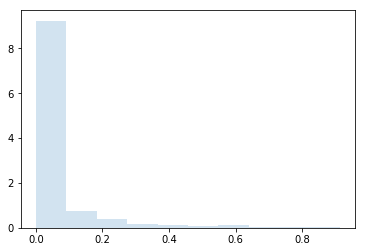

In [14]:
## the distribution i chose here was the beta distribution.
# doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html#scipy.stats.beta

# This is because with the right parameters a and b, the probability density produced 
# resembles that often seen in allele frequency densities.
# let's see what that looks like:

a, b = 1.8, .1
r= beta.rvs(a, b, size=1000)
r= [1-x for x in r] 

fig, ax = plt.subplots(1, 1)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
plt.show()

In [16]:
# a= 1.8 and b= .1 seem appropriate, lets proceed to create our populations

# We must first define the number of populations, the length of the haplotypes desired, and their respective population sizes:
N_pops= 4
L= 200
Sizes= [250,100,300,150]
labels= np.repeat(np.array([x for x in range(N_pops)]),Sizes)

data= []

for k in range(N_pops):
    
    probs= beta.rvs(a, b, size=L)
    probs[(probs > 1)]= 1
    
    m= Sizes[k]
    Haps= [[np.random.choice([1,0],p= [1-probs[x],probs[x]]) for x in range(L)] for acc in range(m)]
    
    data.extend(Haps)

data= np.array(data)
print(data.shape)

(800, 200)


In [17]:
n_comp = 3

pca = PCA(n_components=n_comp, whiten=False,svd_solver='randomized')
features = pca.fit_transform(data)

print("; ".join(['PC{0}: {1}'.format(x+1,round(pca.explained_variance_ratio_[x],3)) for x in range(n_comp)]))
print(features.shape)

PC1: 0.143; PC2: 0.093; PC3: 0.063
(800, 3)


In [18]:
## lets visualize the result now:

fig_data= [go.Scatter3d(
        x = features[[x for x in range(sum(Sizes)) if labels[x] == i],0],
        y = features[[x for x in range(sum(Sizes)) if labels[x] == i],1],
        z = features[[x for x in range(sum(Sizes)) if labels[x] == i],2],
        type='scatter3d',
        mode= "markers",
        marker= {
        'line': {'width': 0},
        'size': 4,
        'symbol': 'circle',
      "opacity": .8
      },
      name= str(i)
    ) for i in range(N_pops)]


layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

fig = go.Figure(data=fig_data, layout=layout)
iplot(fig)
